Importing libraries to perform Deep Learning

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import numpy as np
import matplotlib.pyplot as plt

Splitting Training & Testing Data

In [2]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Checking Shape of the Features

In [5]:
X_test.shape

(10000, 32, 32, 3)

Function to plot an image and it's label

In [16]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.title(classes[y[index][0]])

These are the classes corresponding to its index values

In [13]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

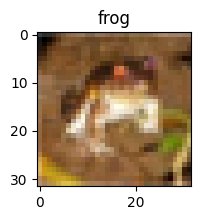

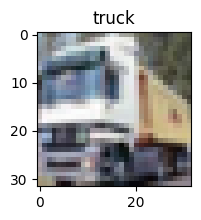

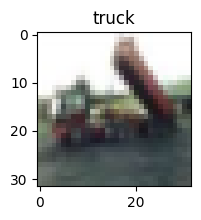

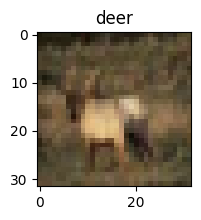

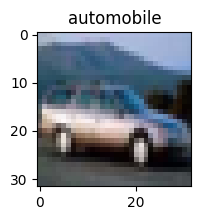

In [17]:
plot_sample(X_train,y_train,0)
plot_sample(X_train,y_train,1)
plot_sample(X_train,y_train,2)
plot_sample(X_train,y_train,3)
plot_sample(X_train,y_train,4)

Normalizing the values in Training & Testing Features

In [18]:
X_train=X_train/255
X_test=X_test/255

Training Artificial Neural Network

In [21]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])
ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
ann.fit(X_train,y_train,epochs=10)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 133s 85ms/step - accuracy: 0.3038 - loss: 1.9313
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 134s 79ms/step - accuracy: 0.4170 - loss: 1.6527
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 78ms/step - accuracy: 0.4558 - loss: 1.5494
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.4778 - loss: 1.4845
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 157s 86ms/step - accuracy: 0.4941 - loss: 1.4443
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 120s 77ms/step - accuracy: 0.5099 - loss: 1.3925
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 76ms/step - accuracy: 0.5278 - loss: 1.3451
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 145s 78ms/step - accuracy: 0.5360 - loss: 1.3174
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 78ms/step - accuracy: 0.5483 - loss: 1.2843
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 77ms/step - accuracy: 0.5644 - loss: 1.2451


Evaluating ANN model

In [45]:
ann.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.5244 - loss: 1.3452


[1.3535276651382446, 0.5160999894142151]

PLotting Accuracy & Loss

<Figure size 640x480 with 0 Axes>

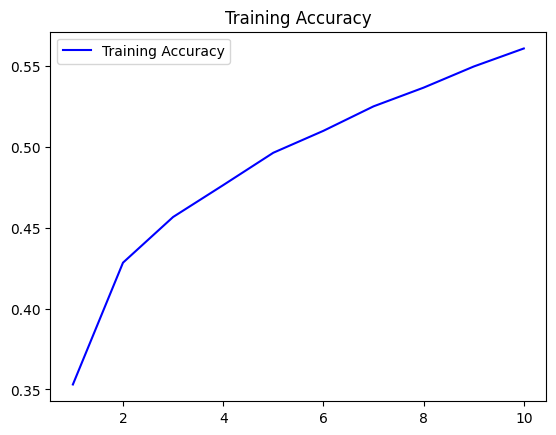

<Figure size 640x480 with 0 Axes>

In [28]:
acc = ann.history.history['accuracy']
loss = ann.history.history['loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.figure()

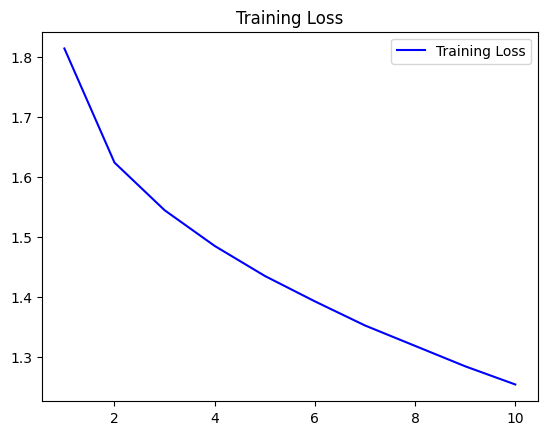

In [29]:
plt.plot(epochs,loss,'b',label='Training Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

Training Artificial Neural Network with Convolutional layers in the begining

In [30]:
cnn = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')
])
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn.fit(X_train,y_train,epochs=10)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 294s 187ms/step - accuracy: 0.4117 - loss: 1.6041
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 285s 182ms/step - accuracy: 0.6623 - loss: 0.9671
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 325s 184ms/step - accuracy: 0.7666 - loss: 0.6793
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 303s 172ms/step - accuracy: 0.8417 - loss: 0.4507
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 319s 170ms/step - accuracy: 0.9102 - loss: 0.2569
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 317s 167ms/step - accuracy: 0.9478 - loss: 0.1559
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 260s 166ms/step - accuracy: 0.9630 - loss: 0.1102
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 267s 169ms/step - accuracy: 0.9691 - loss: 0.0911
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 266s 170ms/step - accuracy: 0.9694 - loss: 0.0943
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 321s 170ms/step - accuracy: 0.9753 - loss: 0.0708


In [31]:
acc_cnn = cnn.history.history['accuracy']
loss_cnn = cnn.history.history['loss']
epochs = range(1,len(acc_cnn)+1)

Plotting Accuracy & Loss

<Figure size 640x480 with 0 Axes>

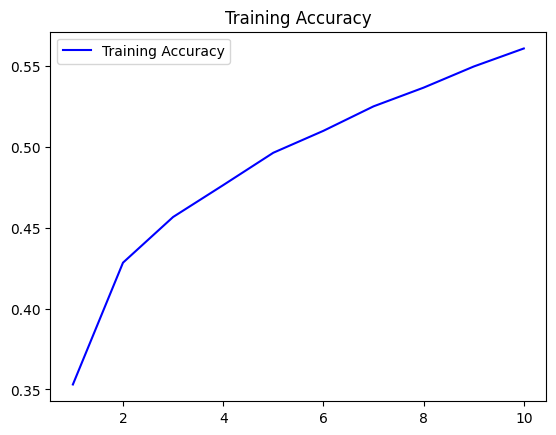

<Figure size 640x480 with 0 Axes>

In [32]:
plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.figure()

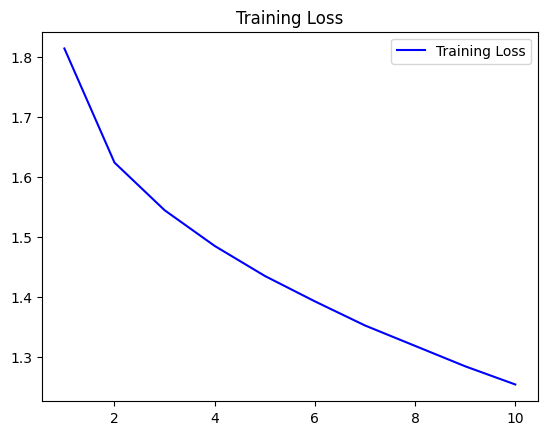

In [33]:
plt.plot(epochs,loss,'b',label='Training Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

Evaluating on the basis of testing data

In [34]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.7024 - loss: 1.6903


[1.705190658569336, 0.6952000260353088]

So, we get 69.52% accuracy on testing data and 97.53% on training data<br>
Defining a function to Process any image to ake it (32,32,3)

In [35]:
from PIL import Image
def process_image(image_path):
  img = Image.open(image_path)
  img = img.resize((32, 32))  # Resize to (32, 32)
  img_array = np.array(img)
  img_array = img_array / 255.0  # Normalize pixel values
  img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
  return img_array

Importing an Image from Internet and predicting

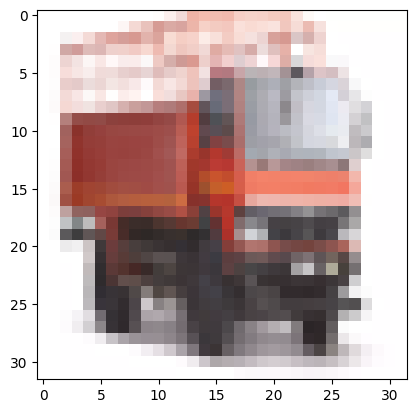

In [37]:
img=process_image('/content/103642063.webp')
plt.imshow(img[0])

In [38]:
ann.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


array([[0.48887596, 0.7336306 , 0.12628728, 0.67654777, 0.2936018 ,
        0.48482072, 0.6996903 , 0.04943788, 0.45338094, 0.89904195]],
      dtype=float32)

Now ANN predicts that it is 89.9% Truck<br>
Defining a function which takes path of an image and preprocess image and also predict it.

In [42]:
def predict_cnn(image_path):
  img = process_image(image_path)
  y_pred = cnn.predict(img)
  predicted_class_index = np.argmax(y_pred, axis=1)[0]
  return classes[predicted_class_index]

In [43]:
predict_cnn('/content/103642063.webp')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


'truck'

So, CNN predicts it as a Truck.

In [44]:
import pickle

# Save the ANN model to a pickle file
with open('ann_model.pkl', 'wb') as file:
  pickle.dump(ann, file)

# Save the CNN model to a pickle file
with open('cnn_model.pkl', 'wb') as file:
  pickle.dump(cnn, file)